# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(10)

#### Import experiment data 

In [47]:
from DATA import NARMA10

data = NARMA10(True, [70,10,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [6]:
N_UNITS = 50

In [9]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.5, ro_rescale=0.8, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [21]:
ip_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.normalMask(N_UNITS), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

In [22]:
ip_reservoir.pre_train(X_TR, eta=0.0000015, epochs=15,  learning_rule="online", verbose=True) #16

- Epoch: 1) | KL Divergence value: 2901.75732421875.
- Epoch: 2) | KL Divergence value: 2865.74609375.
- Epoch: 3) | KL Divergence value: 2829.7470703125.
- Epoch: 4) | KL Divergence value: 2793.732666015625.
- Epoch: 5) | KL Divergence value: 2757.645263671875.
- Epoch: 6) | KL Divergence value: 2721.602783203125.
- Epoch: 7) | KL Divergence value: 2685.648681640625.
- Epoch: 8) | KL Divergence value: 2649.9228515625.
- Epoch: 9) | KL Divergence value: 2614.62255859375.
- Epoch: 10) | KL Divergence value: 2579.85986328125.
- Epoch: 11) | KL Divergence value: 2545.9052734375.
- Epoch: 12) | KL Divergence value: 2512.880126953125.
- Epoch: 13) | KL Divergence value: 2480.942138671875.
- Epoch: 14) | KL Divergence value: 2450.188720703125.
- Epoch: 15) | KL Divergence value: 2420.66064453125.


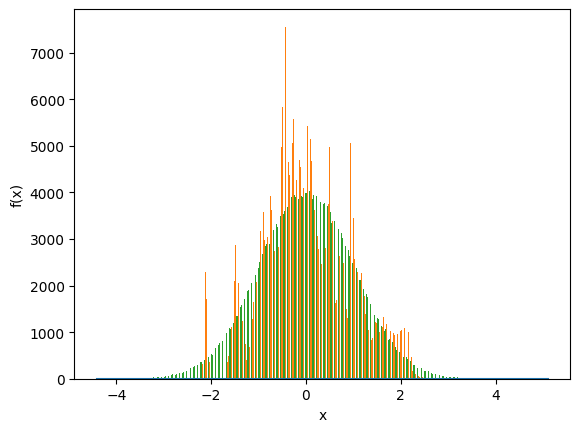

In [23]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

In [24]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (1.343485951423645)  ACTUAL_STD == (0.14089593291282654)][ TARGET_MEAN == (-0.008302664384245872) TARGET_STD == (1.00593900680542)]
Unit - (2): [ ACTUAL_MEAN == (0.4930499792098999)  ACTUAL_STD == (0.0659383162856102)][ TARGET_MEAN == (0.013220570981502533) TARGET_STD == (0.9950580596923828)]
Overall network: [ACTUAL_MEAN == (0.0415065698325634)  ACTUAL_STD == (0.9247897267341614)]


## BIMODAL MIXTURE OF GAUSSIAN

In [35]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 

bimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.mixedBimodalMask(N_UNITS), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
#bimodal_reservoir.b_x = b_x
#bimodal_reservoir.b_u = b_u

In [42]:
bimodal_reservoir.pre_train(X_TR, eta=0.00000025, epochs=50,  learning_rule="online", verbose=True)

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 2999.746826171875.
- Epoch: 2) | KL Divergence value: 2995.896240234375.
- Epoch: 3) | KL Divergence value: 2992.96142578125.
- Epoch: 4) | KL Divergence value: 2991.00244140625.
- Epoch: 5) | KL Divergence value: 2990.077880859375.


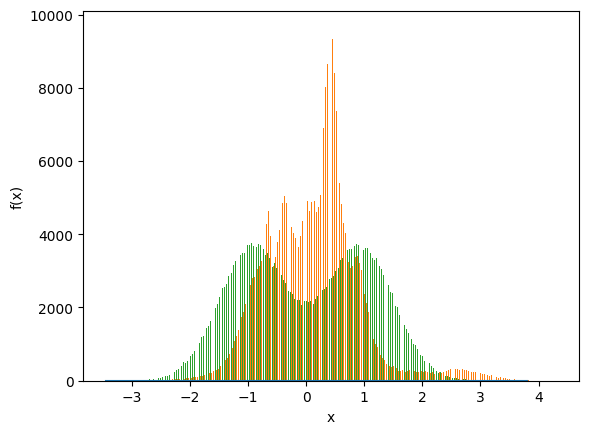

In [43]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

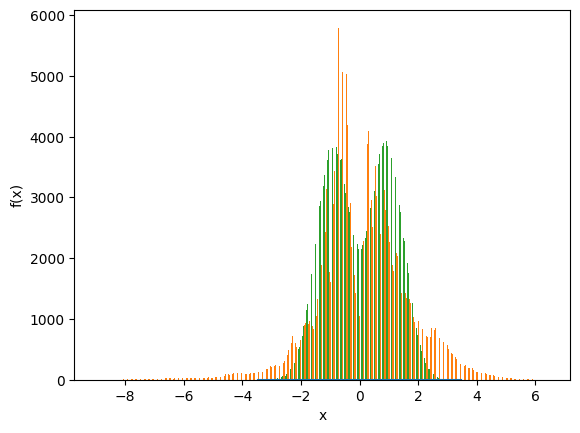

In [64]:
bimodal_reservoir.plot_global_neural_activity()

In [44]:
bimodal_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-0.007122540380805731)  ACTUAL_STD == (0.17239074409008026)][ TARGET_MEAN == (-0.9161611795425415) TARGET_STD == (0.5737823843955994)]
Unit - (2): [ ACTUAL_MEAN == (-0.8675537705421448)  ACTUAL_STD == (0.14689722657203674)][ TARGET_MEAN == (0.922826886177063) TARGET_STD == (0.5824753642082214)]
Overall network: [ACTUAL_MEAN == (0.14068682491779327)  ACTUAL_STD == (0.8035513162612915)]


## EVAUALTUION IN ESN

In [45]:
from ESN import EchoStateNetwork

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

simple_esn.train(X_TR, Y_TR, 0)

from Metrics import NRMSE, MSE

### HANDMADE UGLY LAMBDA SEARCH

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.25067e-10): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


NORMALIZED ROOT-MEAN SQUARE ERROR: 0.020000815183808727


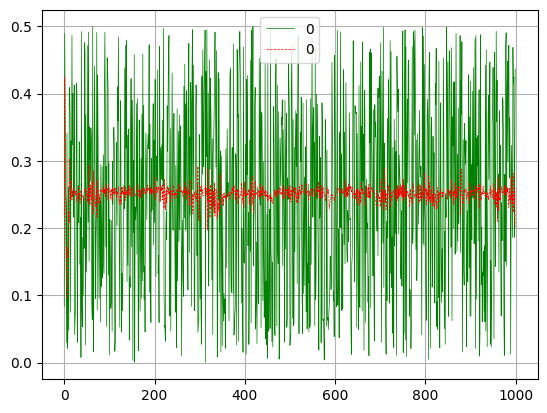

In [48]:
simple_esn.train(X_TR, Y_TR, 0)

#simple_esn.readout.predict(simple_esn.reservoir.predict(X_TR))

print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_VAL, Y_VAL, metric=MSE(), plot=True)}" )

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.40115e-11): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02016065207390905


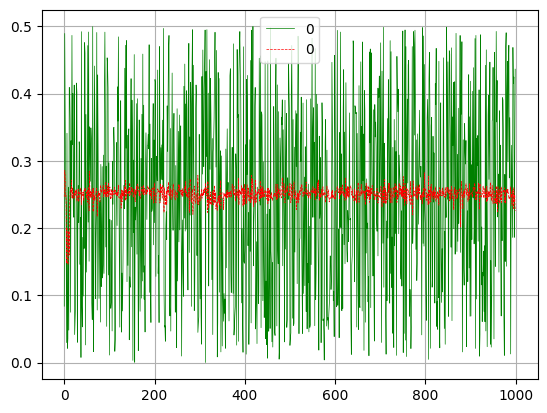

In [49]:

ip_esn.train(X_TR, Y_TR, 0)

print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_VAL, Y_VAL, metric=MSE(), plot=True)}" )

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.32708e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02006804968442173


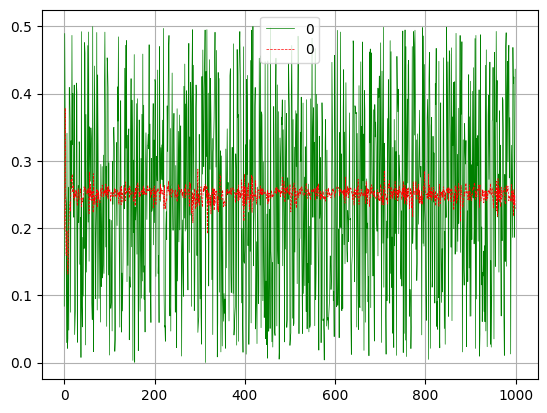

In [50]:
bimodal_esn.train(X_TR, Y_TR, 0)

print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_VAL, Y_VAL, metric=MSE(), plot=True)}" )

### COMPARISON ON TEST DATA

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.020178440403520587


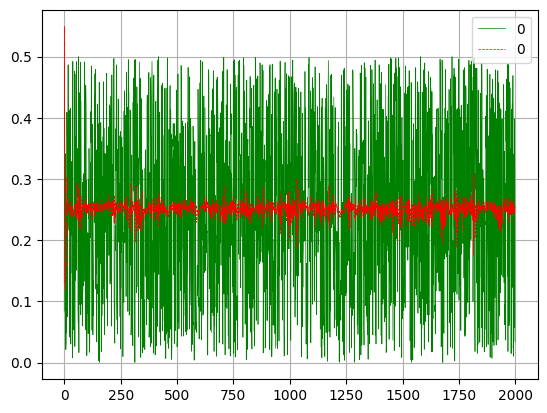

In [51]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.020271882127012388


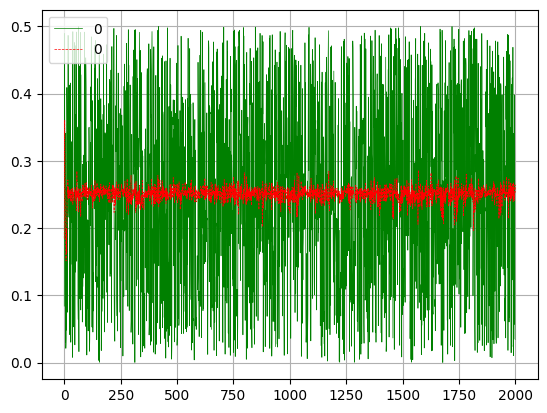

In [52]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02021061899178784


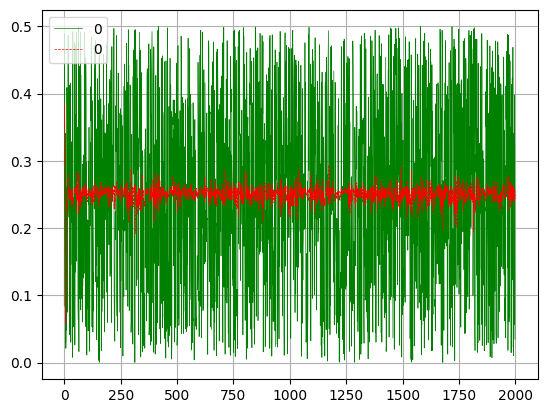

In [53]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

## MEMORY CAPACITY

In [55]:
simple_esn.MemoryCapacity(200,50)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.75051e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.80674e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.78488e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Lo

tensor(1.7059)

In [56]:
ip_esn.MemoryCapacity(200,50)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.55753e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.58079e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.44982e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Lo

tensor(2.1035)

In [57]:
bimodal_esn.MemoryCapacity(200,50)

tensor(1.8734)